In [1]:
import os
os.chdir('../../')
!pwd

/root/python/myenv/medical-coding-reproducibility-main


In [2]:
from src.settings import PALETTE, MODEL_NAMES
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('./files/retrieval/retrieval.csv')
# Replace model names with custom names
df['model'] = df['model'].replace(MODEL_NAMES)
df=df[df['NavgTop']==10]

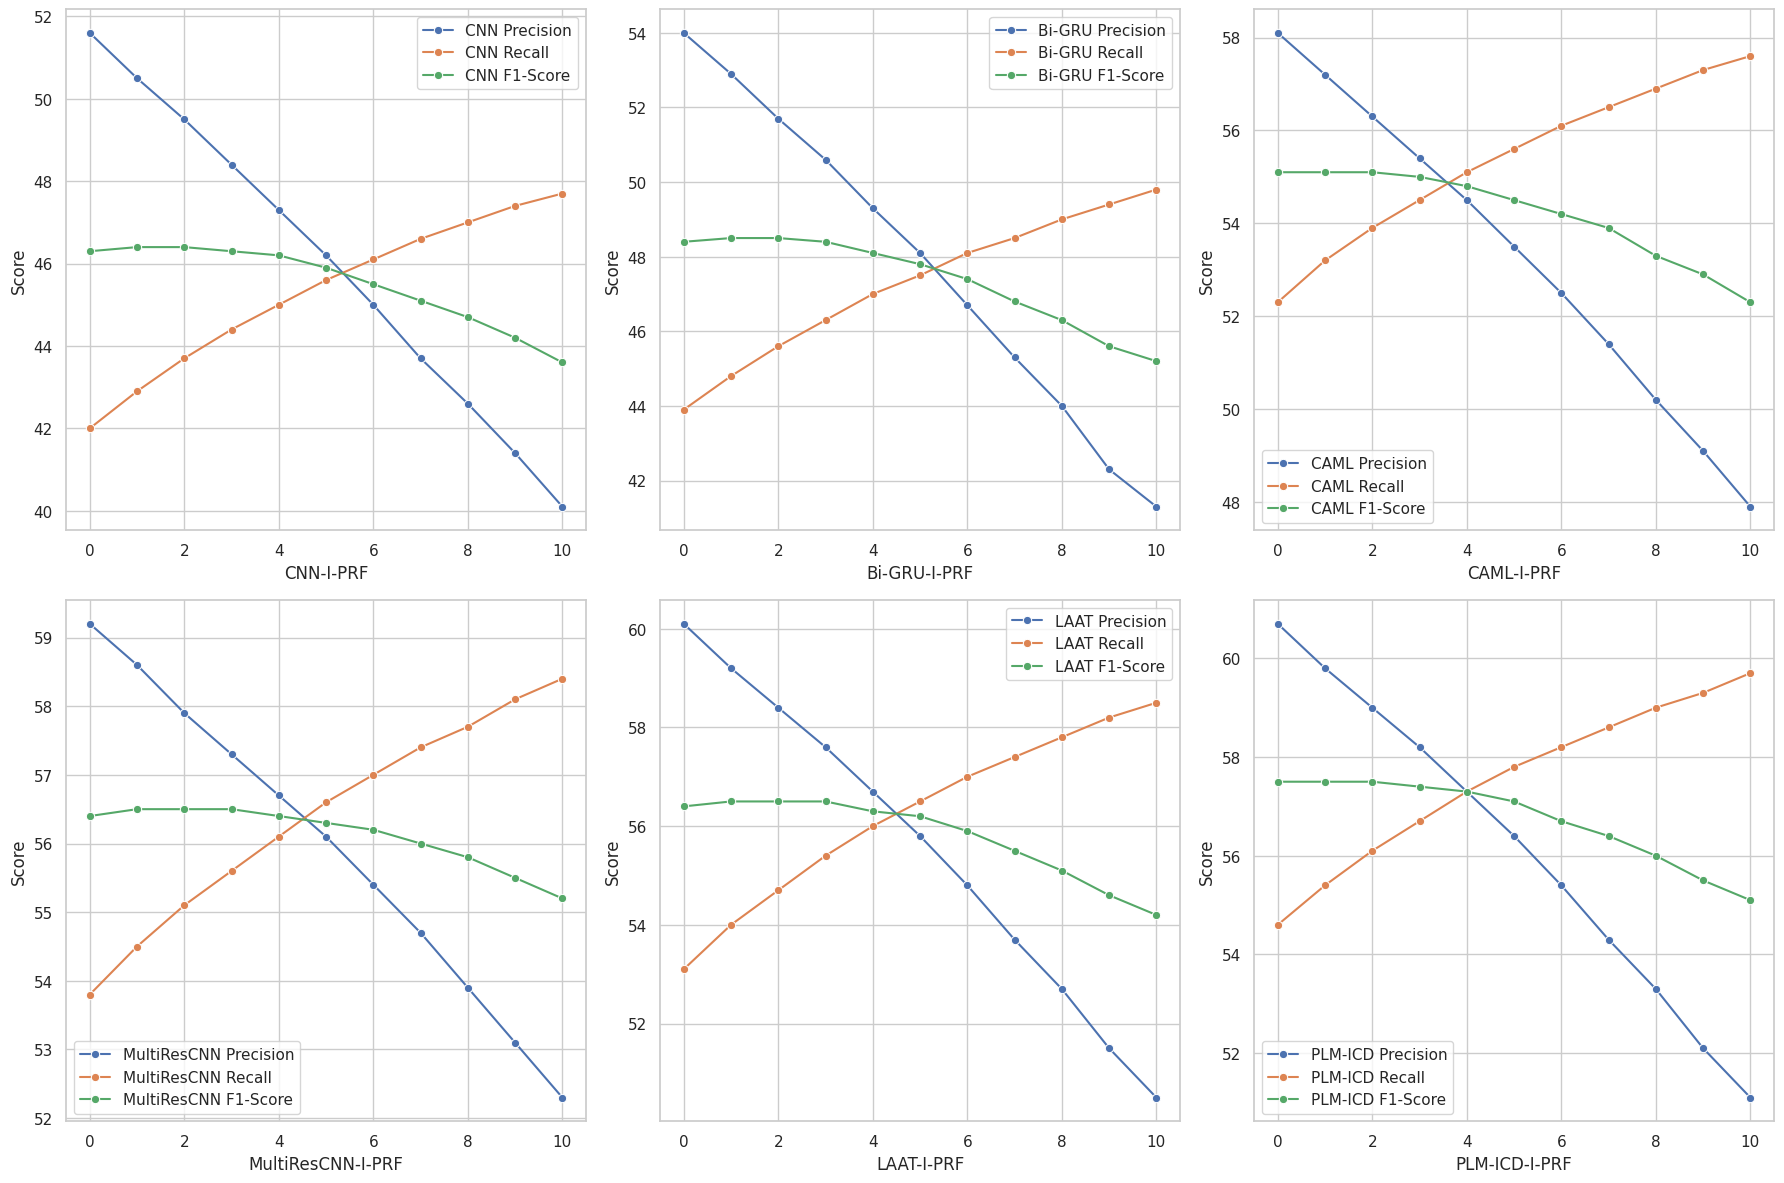

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data
recall = df['recall_micro'].tolist()
precision = df['precision_micro'].tolist()
f1micro = df['f1_micro'].tolist()
Iteration = df['iteration'].tolist()
model_names = df['model'].tolist()  # Assuming you have a column for model names

# Create a DataFrame for plotting
plot_data = {
    'I-PRF': Iteration,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1micro,
    'Model': model_names  # Add the model column
}

# Create a seaborn DataFrame
plot_df = pd.DataFrame(plot_data)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot for each model separately (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust to 2 rows, 3 columns

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop over unique models and plot each model's data on its respective subplot
for idx, model in enumerate(plot_df['Model'].unique()):
    if idx >= 6:  # Ensure we don't exceed the 2x3 grid
        break
    model_data = plot_df[plot_df['Model'] == model]
    ax = axes[idx]  # Get the subplot for the current model
    sns.lineplot(x='I-PRF', y='Precision', data=model_data, label=f'{model} Precision', marker='o', ax=ax)
    sns.lineplot(x='I-PRF', y='Recall', data=model_data, label=f'{model} Recall', marker='o', ax=ax)
    sns.lineplot(x='I-PRF', y='F1-Score', data=model_data, label=f'{model} F1-Score', marker='o', ax=ax)
    
    ax.set_xlabel(f'{model}-I-PRF')
    ax.set_ylabel('Score')
    ax.legend()

# Hide any unused subplots if there are fewer than 6 models
for idx in range(len(plot_df['Model'].unique()), 6):
    fig.delaxes(axes[idx])

# Adjust layout for better spacing
plt.tight_layout()

# Save the image
plt.savefig('./files/retrieval/model_per_Iteration.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


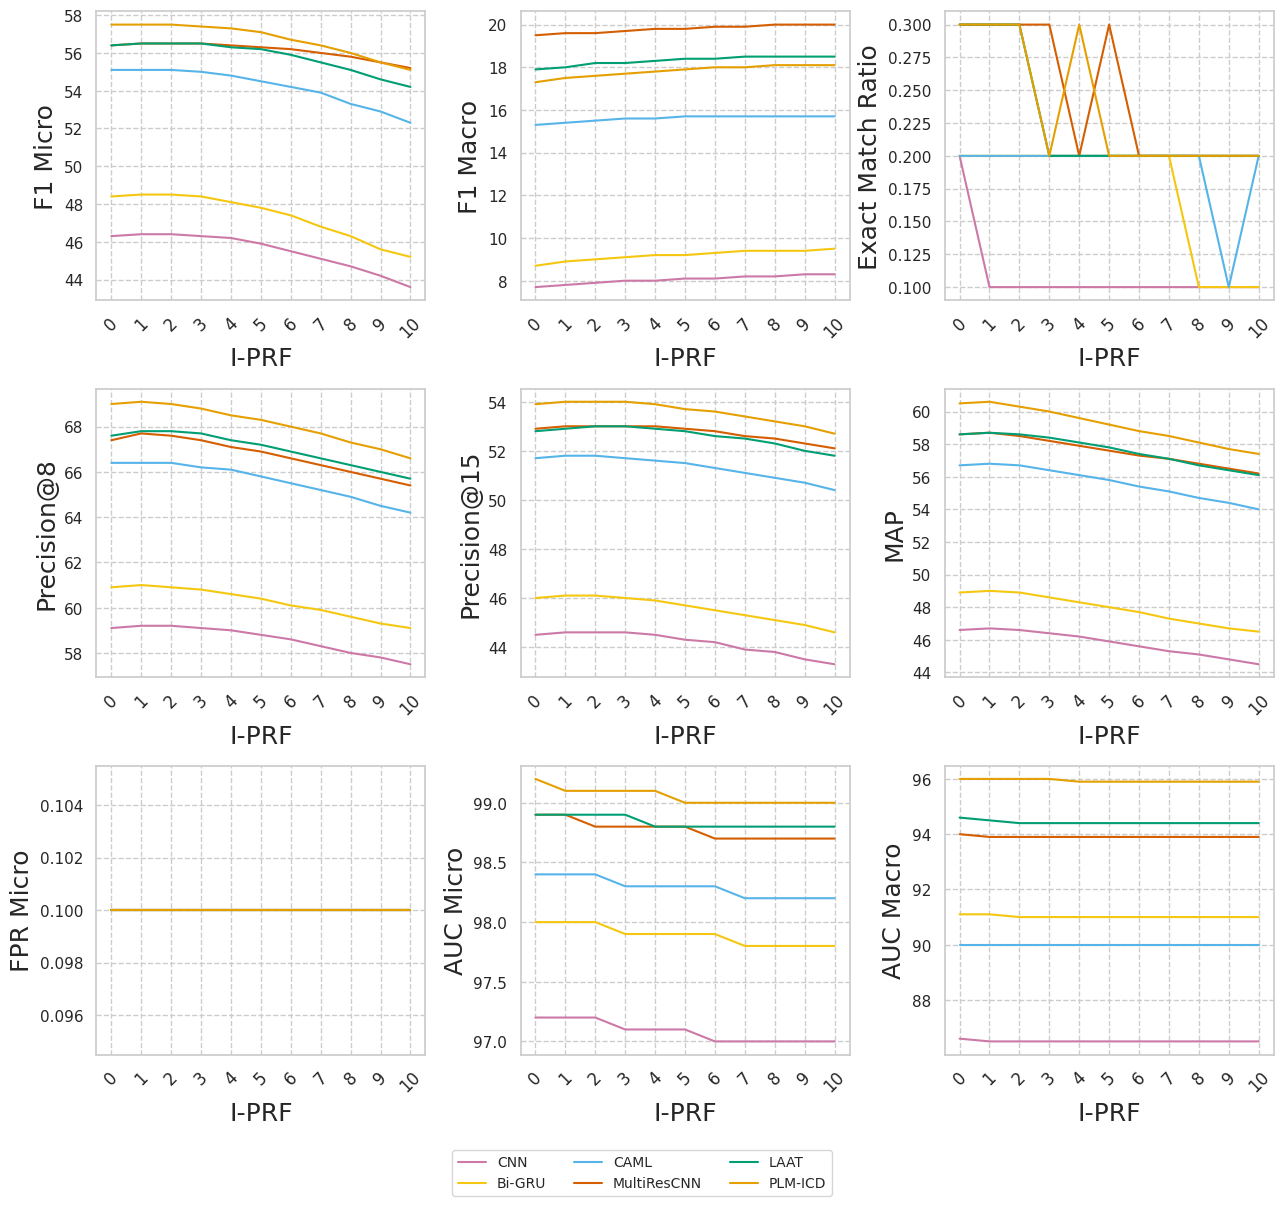

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the dataset has a (0, 0) point for each metric and model
metrics = ['f1_micro', 'f1_macro', 'exact_match_ratio', 'precision@8', 'precision@15', 'map', 'fpr_micro', 'auc_micro', 'auc_macro']
models = df['model'].unique()  # Get the unique models in the dataset

# Titles based on the metric names
titles = ['F1 Micro', 'F1 Macro', 'Exact Match Ratio', 'Precision@8', 'Precision@15', 'MAP', 'FPR Micro', 'AUC Micro', 'AUC Macro']

# Create a figure with 3 columns and 3 rows of subplots
fig, axes = plt.subplots(3, 3, figsize=(13, 12))

# Add a single title at the top
#fig.suptitle('Effect of pseudo relevance feedback across iterations on PLM-ICD', fontsize=22, fontweight='bold')

# Desired x-axis tick positions (include 0)
x_ticks = range(0, 11)

# Loop through each metric and plot it in the corresponding subplot
for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i // 3, i % 3]  # Get the correct subplot (row, col)
    sns.lineplot(x='iteration', y=metric, hue='model', data=df, palette=PALETTE, ax=ax)

    # Customize plot
    ax.set_xlabel('I-PRF', fontsize=18)
    ax.set_ylabel(title, fontsize=18)

    # Add gridlines
    ax.grid(True, axis='both', linestyle='--', linewidth=1)

    # Set x-axis ticks and labels
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)

# Save the image
plt.savefig('./files/retrieval/score_per_Iteration.png', dpi=300, bbox_inches='tight')

# Create a shared legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get legend from the first subplot
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=10)

# Remove legends from individual subplots
for ax in axes.flat:
    ax.legend_.remove()

# Adjust layout to make it look clean
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with suptitle
plt.show()


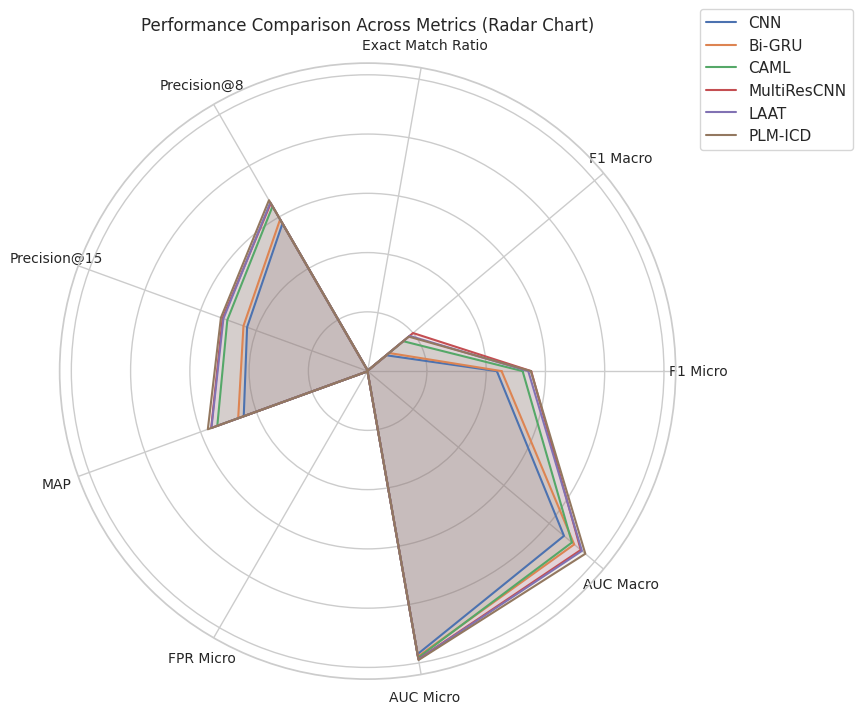

In [5]:
# Sample dataset transformation based on the provided code structure
import numpy as np

# Assuming df contains the dataset with models and metrics
# Selecting the last iteration as the representative values
df_radar = df[df['iteration'] == df['iteration'].max()]

# Extracting unique models and metrics
models = df_radar['model'].unique()
metrics = ['f1_micro', 'f1_macro', 'exact_match_ratio', 'precision@8', 'precision@15', 
           'map', 'fpr_micro', 'auc_micro', 'auc_macro']

# Preparing data for radar chart
radar_data = {model: df_radar[df_radar['model'] == model][metrics].values.flatten().tolist() 
              for model in models}

# Convert metric names to readable format
categories = ['F1 Micro', 'F1 Macro', 'Exact Match Ratio', 'Precision@8', 'Precision@15', 
              'MAP', 'FPR Micro', 'AUC Micro', 'AUC Macro']

# Number of metrics
num_vars = len(categories)

# Compute angles for each metric
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Initialize radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model's performance
for model, values in radar_data.items():
    values += values[:1]  # Close the loop for each model
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Format the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_yticklabels([])
ax.set_title("Performance Comparison Across Metrics (Radar Chart)", fontsize=12)

# Add legend
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Display the chart
plt.show()
